# 1. Data Reading 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor


As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

(1) Demographic Information

- gender: Whether the client is a female or a male (Female, Male).

- SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).

- Partner: Whether the client has a partner or not (Yes, No).

- Dependents: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information

- tenure: Number of months the customer has stayed with the company (Multiple different numeric values).

- Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).

- PaperlessBilling: Whether the client has paperless billing or not (Yes, No).

- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).

- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).

- TotalCharges: The total amount charged to the customer (Multiple different numeric values).

(3) Services Information

- PhoneService: Whether the client has a phone service or not (Yes, No).

- MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).

- InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)

- OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).

- OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).

- : Whether the client has device protection or not (No internet service, No, Yes).

- TechSupport: Whether the client has tech support or not (No internet service, No, Yes).

- StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).

- StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).


# 2. Exploratory Data Analysis and Data Cleaning

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

# Missing values and data types

At the beginning of EDA, we want to know as much information as possible about the data, this is when the pandas.DataFrame.info method comes in handy. This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.

In [ ]:
# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [6]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.dropna(inplace=True)

# Remove customerID column

The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set.

In [8]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

# Payment method denominations

As shown below, some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [9]:
# unique elements of the PaymentMethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# 3. Data Visualization

In this section, we analyze the data by using visualization.

# Response Variable

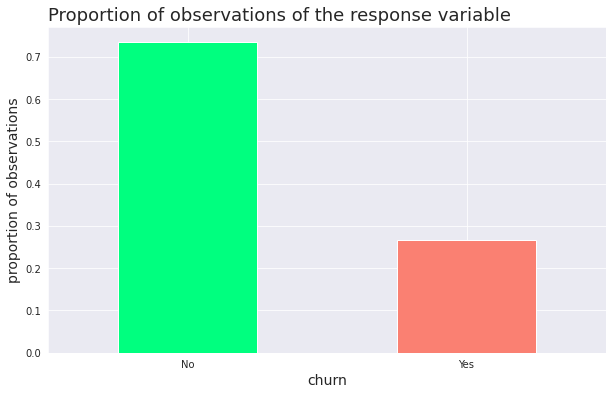

In [15]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')




In this article, we are going to use normalized stacked bar plots to analyze the influence of each independent categorical variable in the outcome.

A normalized stacked bar plot makes each column the same height, so it is not useful for comparing total numbers; however, it is perfect for comparing how the response variable varies across all groups of an independent variable.

On the other hand, we use histograms to evaluate the influence of each independent numeric variable in the outcome. As mentioned before, the data set is imbalanced; therefore, we need to draw a probability density function of each class (density=True) to be able to compare both distributions properly.

# Demographic Information

The following code creates a stacked percentage bar chart for each demographic attribute (gender, SeniorCitizen, Partner, Dependents), showing the percentage of Churn for each category of the attribute.

In [16]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

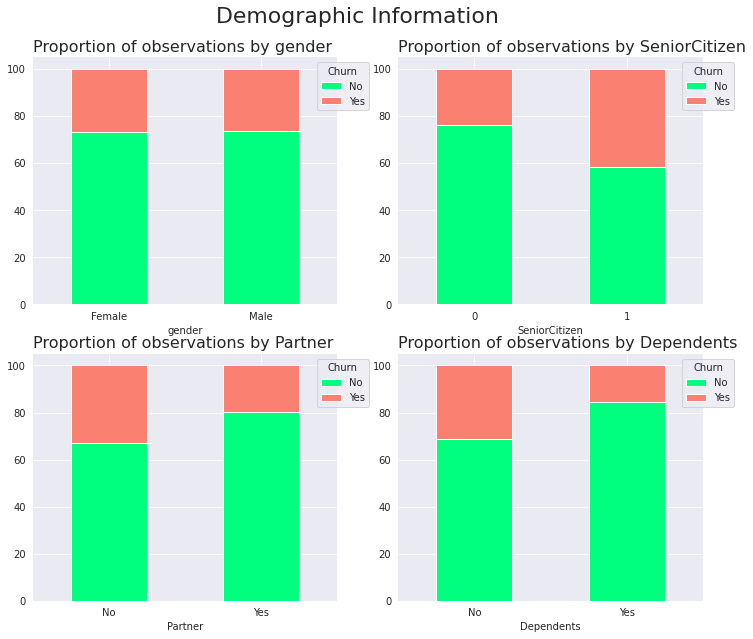

In [21]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

As shown above, each bar is a category of the independent variable, and it is subdivided to show the proportion of each response class (No and Yes).

We can extract the following conclusions by analyzing demographic attributes:

- The churn rate of senior citizens is almost double that of young citizens.
- We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
- Customers with a partner churn less than customers with no partner.

## Customer Account Information — Categorical variables

As we did with demographic attributes, we evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).

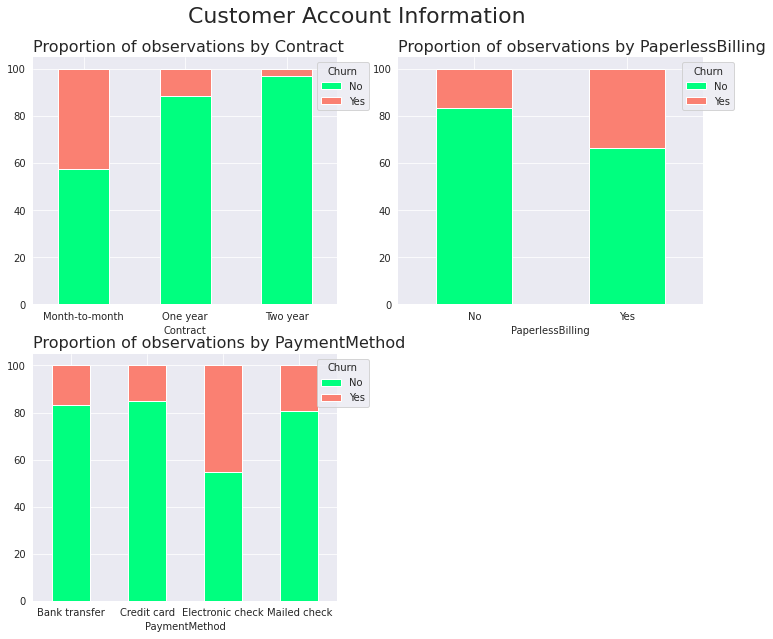

In [22]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:

- Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
- Customers who opted for an electronic check as paying method are more likely to leave the company.
- Customers subscribed to paperless billing churn more than those who are not subscribed.

## Customer Account Information — Numerical variables

The following plots show the distribution of tenure, MontlyCharges, TotalCharges by Churn. For all numeric attributes, the distributions of both classes (No and Yes) are different which suggests that all of the attributes will be useful to determine whether or not a customer churns.

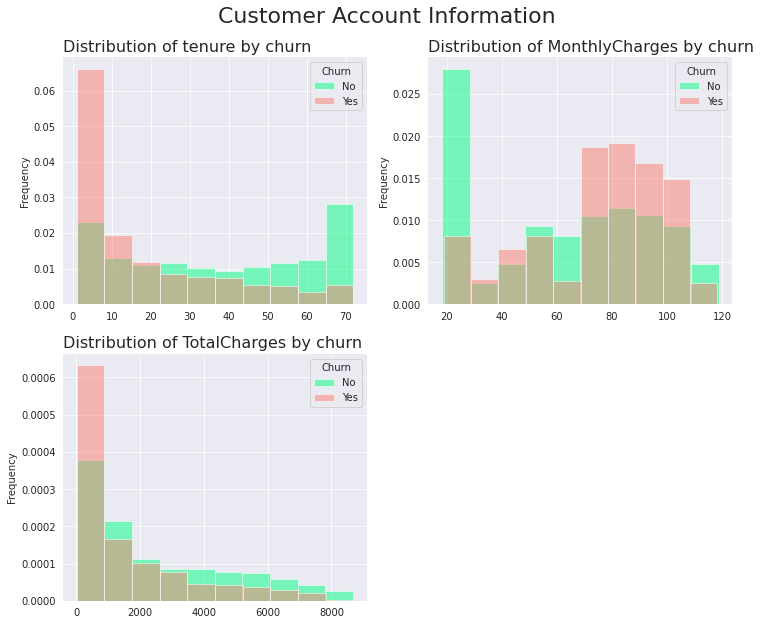

In [29]:
def histogram_plots(columns_to_plot, super_title):
    
     '''
     Prints a histogram for each independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    # set number of rows and number of columns
     number_of_columns = 2
     number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
     fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
     fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
     for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
                        
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')

We can extract the following conclusions by analyzing the histograms above:

- The churn rate tends to be larger when monthly charges are high.
- New customers (low tenure) are more likely to churn.
- Clients with high total charges are less likely to leave the company.

## Services Information

Lastly, we evaluate the percentage of the target for each category of the services columns with stacked bar plots.

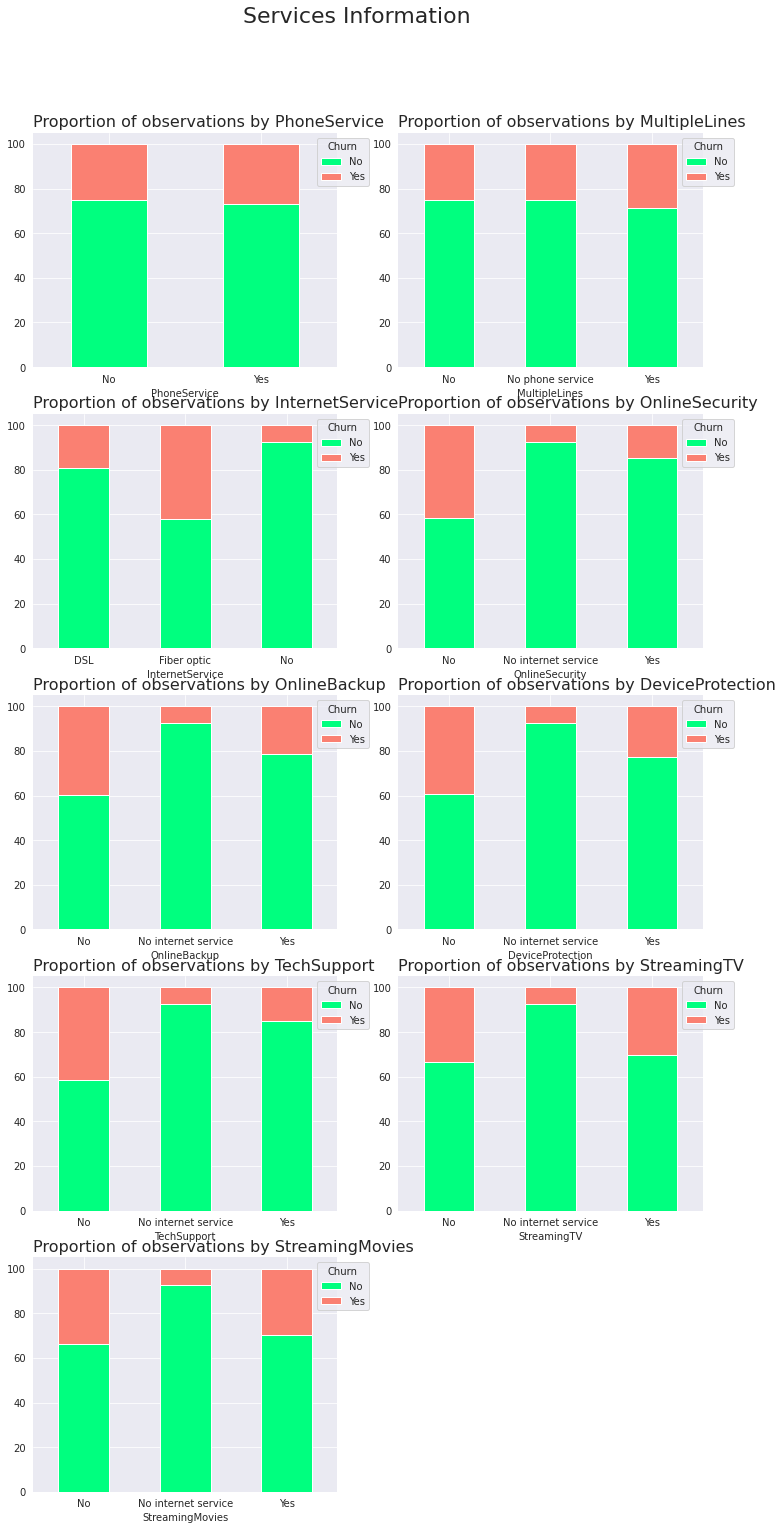

In [30]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:

- We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
- Clients with online security churn less than those without it.
- Customers with no tech support tend to churn more often than those with tech support.

By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.

## 4. Feature importance

### Mutual information — analysis of linear and nonlinear relationships

Mutual information measures the mutual dependency between two variables based on entropy estimations. In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.


The Scikit-Learn library has implemented mutual information in the metrics package. The following code computes the mutual information score between each categorical variable of the data set and the Churn variable.

In [36]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return metrics.mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable 
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target. As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

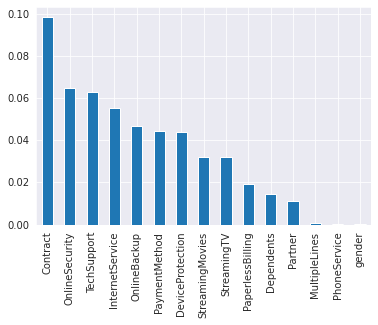

In [40]:
import matplotlib.pyplot as plt
feature_importance.plot.bar()


The mutual information extends the notion of correlation to nonlinear relationships since, unlike Pearson’s correlation coefficient, this method is able to detect not only linear relationships but also nonlinear ones.

## 5. Feature Engineering

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process. The techniques implemented in this project are described in more detail below. All transformations are implemented using only Pandas; however, we also provide an alternative implementation using Scikit-Learn. As you can see, there are multiple ways to solve the same problem 😃.

# Label Encoding

In [42]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 

# One-Hot Encoding

One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in the data. In this project, we apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV, and (10)StreamingMovies.

In [43]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)


The main drawback of this encoding is the significant increase in the dimensionality of the dataset (curse of dimensionality); therefore, this method should be avoided when the categorical column has a large number of unique values.

## Normalization

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process; however, it does not mean those variables are more important to predict the target. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this project, we will use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [44]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)   


## 7. Splitting the data in training and testing sets

In [45]:
# select independent variables
X = df_transformed.drop(columns='Churn')

# select dependent variables
y = df_transformed.loc[:, 'Churn']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)

## 8. Assessing multiple algorithms

Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects. Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

In this project, we compare 6 different algorithms, all of them already implemented in Scikit-Learn.

- Dummy classifier (baseline)
- K Nearest Neighbours
- Logistic Regression
- Support Vector Machines
- Random Forest
- Gradiente Boosting

In [50]:
def create_models(seed=2):
    

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [53]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.745164960182025)
Classifier: k_nearest_neighbors, Accuracy: 0.7531285551763367)
Classifier: logistic_regression, Accuracy: 0.7923777019340159)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier: support_vector_machines, Accuracy: 0.7878270762229806)
Classifier: random_forest, Accuracy: 0.7713310580204779)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)


# 9. Algorithm selected: Gradient Boosting

Gradient Boosting is a very popular machine learning ensemble method based on a sequential training of multiple models to make predictions. In Gradient Boosting, first, you make a model using a random sample of your original data. After fitting the model, you make predictions and compute the residuals of your model. The residuals are the difference between the actual values and the predictions of the model. Then, you train a new tree based on the residuals of the previous tree, calculating again the residuals of this new model. We repeat this process until we reach a threshold (residual close to 0), meaning there is a very low difference between the actual and predicted values. Finally, you take a sum of all model forecasts (prediction of the data and predictions of the error) to make a final prediction.

GradientBoostingClassifier has multiple hyperparameters; some of them are listed below:

- learning_rate: the contribution of each tree to the final prediction.
- n_estimators: the number of decision trees to perform (boosting stages).
- max_depth: the maximum depth of the individual regression estimators.
- max_features: the number of features to consider when looking for the best split.
- min_samples_split: the minimum number of samples required to split an internal node.

The next step consists of finding the combination of hyperparameters that leads to the best classification of our data. This process is called hyperparameter tuning.

## 10. Hyperparameter tuning

Thus far we have split our data into a training set for learning the parameters of the model, and a testing set for evaluating its performance. The next step in the machine learning process is to perform hyperparameter tuning. The selection of hyperparameters consists of testing the performance of the model against different combinations of hyperparameters, selecting those that perform best according to a chosen metric and a validation method.

For hyperparameter tuning, we need to split our training data again into a set for training and a set for testing the hyperparameters (often called validation set). It is a very common practice to use k-fold cross-validation for hyperparameter tuning. The training set is divided again into k equal-sized samples, 1 sample is used for testing and the remaining k-1 samples are used for training the model, repeating the process k times. Then, the k evaluation metrics (in this case the accuracy) are averaged to produce a single estimator.

It is important to stress that the validation set is used for hyperparameter selection and not for evaluating the final performance of our model, as shown in the image below.

![image.png]()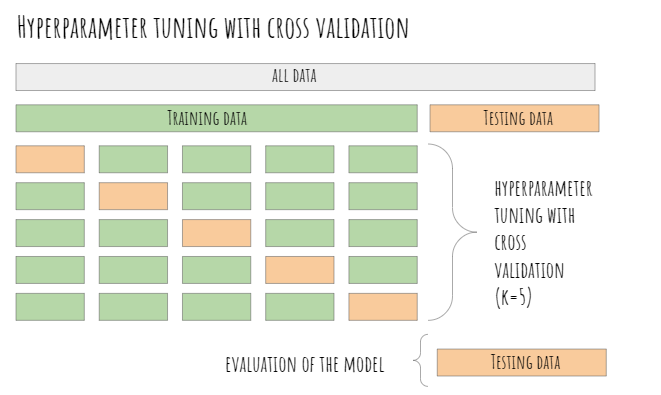

There are multiple techniques to find the best hyperparameters for a model. The most popular methods are (1) grid search, (2) random search, and (3) bayesian optimization. Grid search test all combinations of hyperparameters and select the best performing one. It is a really time-consuming method, particularly when the number of hyperparameters and values to try are really high.

In random search, you specify a grid of hyperparameters, and random combinations are selected where each combination of hyperparameters has an equal chance of being sampled. We do not analyze all combinations of hyperparameters, but only random samples of those combinations. This approach is much more computationally efficient than trying all combinations; however, it also has some disadvantages. The main drawback of random search is that not all areas of the grid are evenly covered, especially when the number of combinations selected from the grid is low.

First of all, we specify the grid of hyperparameter values using a dictionary (grid_parameters) where the keys represent the hyperparameters and the values are the set of options we want to evaluate. Then, we define the RandomizedSearchCV object for trying different random combinations from this grid. The number of hyperparameter combinations that are sampled is defined in the n_iter parameter. Naturally, increasing n_iter will lead in most cases to more accurate results, since more combinations are sampled; however, on many occasions, the improvement in performance won’t be significant.

In [55]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)


{'n_estimators': 90, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 4}


After fitting the grid object, we can obtain the best hyperparameters using best_params_attribute. As you can above, the best hyperparameters are: 

{‘n_estimators’: 90, ‘min_samples_split’: 3, ‘max_features’: ‘log2’,‘max_depth’: 3}.

## 11. Performace of the model

The last step of the machine learning process is to check the performance of the model (best hyperparameters ) by using the confusion matrix and some evaluation metrics.

## Confusion matrix
The confusion matrix, also known as the error matrix, is used to evaluate the performance of a machine learning model by examining the number of observations that are correctly and incorrectly classified. Each column of the matrix contains the predicted classes while each row represents the actual classes or vice versa. In a perfect classification, the confusion matrix will be all zeros except for the diagonal. All the elements out of the main diagonal represent misclassifications. It is important to bear in mind that the confusion matrix allows us to observe patterns of misclassification (which classes and to which extend they were incorrectly classified).

In binary classification problems, the confusion matrix is a 2-by-2 matrix composed of 4 elements:

- TP (True Positive): number of patients with spine problems that are correctly classified as sick.
- TN (True Negative): number of patients without pathologies who are correctly classified as healthy.
- FP (False Positive): number of healthy patients that are wrongly classified as sick.
- FN (False Negative): number of patients with spine diseases that are misclassified as healthy.

Now that the model is trained, it is time to evaluate its performance using the testing set. First, we use the previous model (gradient boosting classifier with best hyperparameters) to predict the class labels of the testing data (with the predict method). Then, we construct the confusion matrix using the confusion_matrix function from the sklearn.metrics package to check which observations were properly classified. The output is a NumPy array where the rows represent the true values and the columns the predicted classes.

In [57]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1147,  163],
       [ 202,  246]])

As shown above, 1402 observations of the testing data were correctly classified by the model (1154 true negatives and 248 true positives). On the contrary, we can observe 356 misclassifications (156 false positives and 200 false negatives).

## Evaluation metrics

Evaluating the quality of the model is a fundamental part of the machine learning process. The most used performance evaluation metrics are calculated based on the elements of the confusion matrix.

- Accuracy: It represents the proportion of predictions that were correctly classified. Accuracy is the most commonly used evaluation metric; however, it is important to bear in mind that accuracy can be misleading when working with imbalanced datasets.

- Sensitivity: It represents the proportion of positive samples (diseased patients) 

- Specificity: It represents the proportion of negative samples (healthy patients) 

- Precision: It represents the proportion of positive predictions that are actually correct.


In [60]:
# print classification report 
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1310
           1       0.60      0.55      0.57       448

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



As shown above, we obtain a sensitivity of 0.55 (248/(200+248)) and a specificity of 0.88 (1154/(1154+156)). The model obtained predicts more accurately customers that do not churn. This should not surprise us at all, since gradient boosting classifiers are usually biased toward the classes with more observations.

As you may have noticed, the previous summary does not contain the accuracy of the classification. However, this can be easily calculated using the function accuracy_score from the metrics module.

In [61]:
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions)

0.7923777019340159

As you can observe, hyperparameter tuning has barely increased the accuracy of the model.

## 12. Drawing conclusions — Summary

In this post, we have walked through a complete end-to-end machine learning project using the Telco customer Churn dataset. We started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables (feature engineering). After transforming the data, we tried 6 different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the Gradient Boosting Classifier (best performance model) for model optimization, obtaining an accuracy of nearly 80% (close to 6% higher than the baseline).